In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
df=pd.read_csv("train.csv")

In [3]:
print(df.shape)

(42000, 785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df.columns)
print(type(df))

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<class 'pandas.core.frame.DataFrame'>


In [6]:
data=df.values
print(type(data))

<class 'numpy.ndarray'>


In [7]:
X=data[:, 1:]
Y=data[ : ,0]

In [8]:
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [9]:
def drawimage(sample):
    sample= sample.reshape((28,28))
    plt.imshow(sample,cmap="gray")
    plt.show()

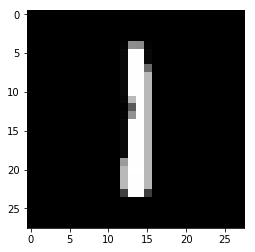

1


In [17]:
drawimage(X[2])
print(Y[2])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [12]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(33600, 784) (33600,)
(8400, 784) (8400,)


# knn

In [13]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(x,y,query_point,k=5):
    vals = [] # to store the distance
    m = x.shape[0]
    for i in range(m):
        d = distance(query_point,x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    
    vals=np.array(vals)
    
    new_vals = np.unique(vals[: ,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

    
    

# prediction

In [20]:
pred = knn(X_train,Y_train,X_test[15])

print(int(pred))

4


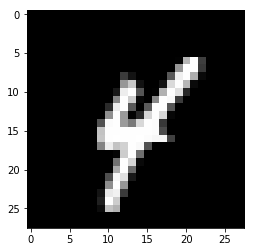

4


In [18]:
drawimage(X_test[15])
print(Y_test[15])